This file was created by Mamoru Saita. This file is placed in python-molbot (https://github.com/hori-group/python-molbot/).
# Pythonを用いたDNA反応動態シミュレーション

### **1.1 本教材の対象**



* 反応速度論を学習したが、化学反応のシミュレーションの実装方法が分からない方

* Pythonを用いた化学反応のシミュレーションの実装方法に興味がある方


### **1.2 本教材のゴール**
 * Pythonを用いて、パラメタを探索可能なDNA反応のシミュレーションを実装できるようになる






### **1.3 目次**



1. **導入**

2. **反応速度論と微分方程式の復習**

3. **Pythonプログラミングの基礎**

4. **DNA回路のシミュレーション**

5. **発展:反応拡散方程式による時空間パターンの形成シミュレーション**







### **1.4 Google Colaboratory を使用する上での注意点**


####**1.4.1 Google Colaboratoryのファイルを開いたときの注意点**
Google Colaboratoryのファイルを開いた際には必ず、ご自身のGoogle Driveに保存するようにしましょう。

(内容を改変した場合、保存されない可能性があります。)

以下の画像を参考にして、ご自身のGoogle Driveに保存しましょう。

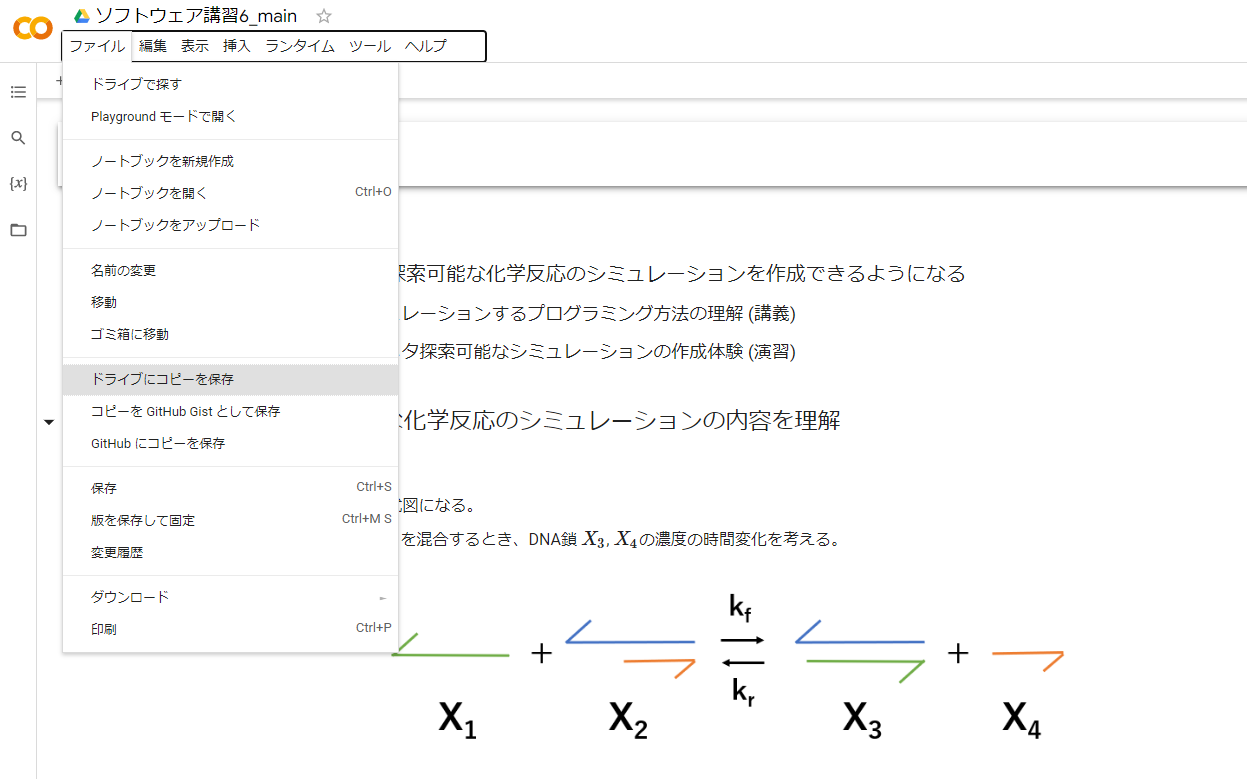








#### **1.4.2 Google Colaboratory上でのプログラムの実行とコメント記載方法**
##### **・プログラムの実行方法**
Google Colaboratory上でプログラムを実行する (動かす) 際は、プログラムが書かれているセル (カタマリ) の左上にある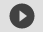
ボタンをクリックすることで実行することができます。試しに、次のセルにあるコードを実行してみましょう。

("Hello World!"と出力されれば、正常に実行されたことになります。)

<br>

##### **・ コメント記載方法**
Pythonで書かれたプログラムでは "#" を書くことで "#" 以下の内容はプログラムとして実行されず、コメントとして残すことができます。

In [ ]:
print("Hello World!")
#print("Python")

Hello World!


## **2. 反応速度論と微分方程式の復習**
本章では、まず初めに化学反応を定式化するために用いる反応速度論の概要と質量作用の法則の復習を行う。

そして、それらをもとに化学反応の反応図から微分方程式モデルを導出する方法を紹介する。



### **2.1 反応速度論の考え方と質量作用の法則**
本節では、化学反応を定式化するために、用いる反応速度論および質量作用の法則について説明する。


#### **2.1.2 質量作用の法則**
反応速度論の中でも反応速度と反応物のモル濃度の関係を表した法則として質量作用の法則がある。本小節では、質量作用の法則の内容とその例について説明する。
<br>
<br>

* **質量作用の法則**：反応速度は反応物の濃度の積に比例する
<br>
<br>

**反応速度の例 ($k$は反応速度定数)**

各次数の反応について質量作用の法則を適用すると反応速度$v(t)$は以下のように表せる。

(一般にはn次反応はn種類の反応物から構成される反応になるが、多くは2次反応までで記述できるため、今回は2次反応までの反応速度の例を示した。)


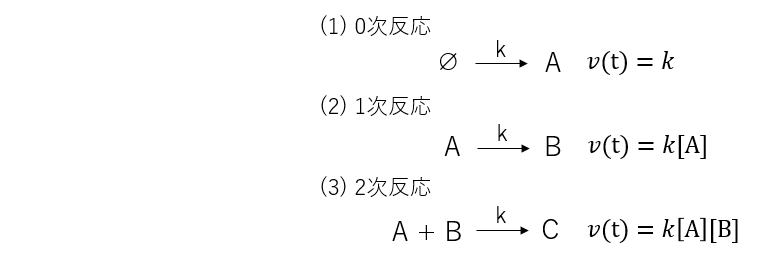


### **2.2 反応速度と微分方程式モデル**
本節では、DNA鎖の結合・乖離反応を例にして、各反応の反応速度から各反応物の濃度$x_i(t)$の時間変化 ${\frac{dx_i(t)}{dt}}$ を定式化する方法を説明する。



#### **2.2.1 DNA鎖の結合・乖離反応の模式図**
以下にDNA鎖の結合・乖離反応の模式図を示す。
この反応の正反応 (左から右の方向の反応)は2次反応、逆反応 (右から左の方向の反応)は1次反応と考えることができる。($k_f$, $k_r$はそれぞれ正反応と逆反応の反応速度定数)

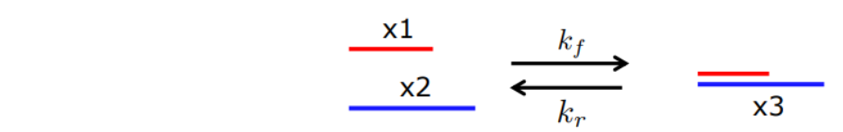


#### **2.2.2 正反応と逆反応の反応速度と各反応を考慮した際の反応物の時間変化**
* 各反応を考慮した際の反応物の時間変化${\frac{dx_i(t)}{dt}}$は、**反応物が関与する反応の反応速度の和**で表される。(生成する反応を正, 分解する反応を負として反応速度を足し合わせる)
<br>
<br>
* 前小節で紹介したDNA鎖の結合・乖離反応において、$x_3(t)$の反応物の時間変化${\frac{dx_3(t)}{dt}}$を考えると、${\frac{dx_3(t)}{dt}} = v_f(t) -v_r(t)$と定式化することができ、質量作用の法則を適用すると以下のように、反応速度定数と各反応物の濃度を用いて、定式化することができる。(ただし、$v_f(t)$,$v_r(t)$をそれぞれ正反応と逆反応の反応速度とする)

<br>

\begin{align}
&v_f(t) = k_f x_1(t) x_2(t)\\
&v_r(t) = k_r x_3(t)\\
&\frac{d x_3}{dt} = v_f(t) - v_r(t) = k_f x_1(t) x_2(t) - k_r x_3(t) \\
&\end{align}

### **2.3 反応速度論より作成した微分方程式モデルの例 (鎖置換反応)**
本節では、前節で解説した反応速度論および質量作用の法則を用いてDNA鎖置換反応を定式化する方法を説明する。本節で導いた微分方程式は、第4章にて使用するため、導出方法を留意されたい。


#### **2.3.1 DNA鎖置換反応の反応概略図**
DNA鎖置換反応の反応概略図を以下に示す。この反応は正反応、逆反応のそれぞれで2種類の反応物が用いられているため、それぞれ2次反応として考えることができる。

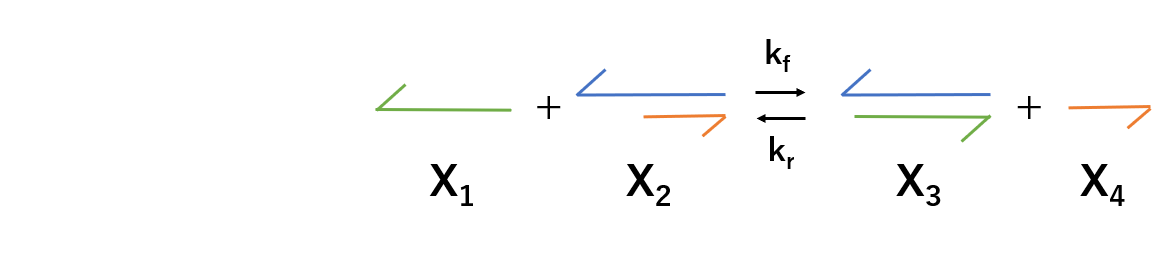

#### **2.3.2 DNA鎖置換反応の微分方程式モデル**
* 2.3.1の説明より、この反応は正反応、逆反応ともに2次反応としてみなせるため、それぞれの反応の反応速度を$v_f(t)$, $v_r(t)$とすると以下のように定式化できる。
<br>
<br>
\begin{align}
& v_f(t) = k_f x_1 x_2\\
& v_r(t) = k_r x_3 x_4\\
&\end{align}

* また、上式を用いるとそれぞれの反応物の時間変化${\frac{dx_i(t)}{dt}}$は以下のように、連立微分方程式で定式化できる。

<br>
<br>

\begin{align}
&\frac{d x_1}{dt} = -k_f x_1 x_2 + k_r x_3 x_4\\
&\frac{d x_2}{dt} = -k_f x_1 x_2 + k_r x_3 x_4\\
&\frac{d x_3}{dt} = k_f x_1 x_2 - k_r x_3 x_4\\
&\frac{d x_4}{dt} = k_f x_1 x_2 - k_r x_3 x_4\\
&\end{align}


* 微分方程式モデルをもとに、各DNA鎖の濃度の時間変化をシミュレーションしたい！
* 第4章では上記の微分方程式モデルをもとにしたシミュレーションの実装方法を紹介する。

## **3. Pythonプログラミングの基礎**
本章では、Pythonの基礎的なプログラミング方法と微分方程式の解き方および視覚的にパラメタを変化させる方法を紹介する。

具体的には、まず1次反応を例にして、微分方程式の解き方を紹介する。

その後、そのプログラムを用いて視覚的にパラメタを変化させる方法を紹介する。

Pythonの基本的なプログラミング方法をより詳しく知りたい方は以下のノートブックを参照されたい。

https://drive.google.com/file/d/1D8YBl_WBLknTLW-JtlXdV7mksyx8jI7S/view?usp=sharing

### **3.1 Pythonを用いた微分方程式の解法**
本節では、ScipyというPythonのライブラリを用いて、微分方程式を解く方法を紹介する。

グラフの描画方法などは、上記のリンクを参照されたい。

ここでは、化学的な微分方程式の代表例として、1次反応によるDNA濃度の時間変化を考える。






#### **3.1.1 反応概略図**

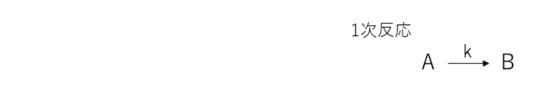

<br>
<br>



#### **3.1.2 微分方程式モデル**

\begin{align}
&\frac{d [A]}{dt} = -k[A]\\
&\frac{d [B]}{dt} = k[A]\\
&\end{align}

<br>
ここで、$k$は反応速度定数である。

#### **3.1.3 微分方程式を解くサンプルプログラム**
本小節では、Pythonを用いて微分方程式モデルを解く方法について説明する。本教材では、**scipy**というライブラリの**integrate.odeint**というツールを用いて、微分方程式モデルを解く方法を説明する。このツールは、微分方程式モデルの定義、微分方程式の各変数の初期値や定数の設定をすることで各変数の時間変化がシミュレーションできるツールである。詳しい文法に関しては、以下のサンプルコードを参照されたい。


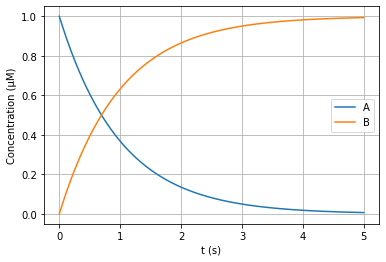

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt


# 初期濃度
A_0 = 1 #µM
B_0 = 0 #µM
y_0 = [A_0, B_0]

# 反応速度定数
k = 1 

# 微分方程式を解くためのツールのインポート
from scipy.integrate import odeint

# 時間を定義
t = np.linspace(0, 5.0, 1000)

# 解きたい微分方程式の定義
def dydt(y, t):
  dydt = [-k*y[0], k*y[0]]
  return dydt


# 微分方程式を解かせる
y = odeint(dydt, y_0, t).T

# グラフの可視化
plt.plot(t,y[0], label = "A")
plt.plot(t,y[1], label = "B")
plt.xlabel('t (s)')
plt.ylabel('Concentration (µM)')
plt.grid(':')
plt.legend()
plt.show()

今回使用した微分方程式を解くツール (scipy.integrate.odeint) について詳しく知りたい場合には、以下のサイトを参照されたい。
https://docs.scipy.org/doc/scipy/reference/integrate.html



### **3.2 視覚的にパラメタを変化させる方法**
本節では、Gooogle Colablatory上でスライドバーを使って視覚的にパラメタを変化させる方法を紹介する。

この方法を学ぶことで、コード自体を編集することなく、パラメタを変化させたグラフを表示することができるようになる。

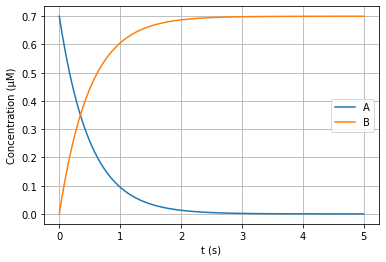

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# スライドバーの設置
#@title Sample  { run: "auto", vertical-output: true, form-width: "50%", display-mode: "both" }

# 初期濃度(µM)をスライドバーで変化
A_0 = 1

B_0 = 0 

y_0 = [A_0, B_0]

# 反応速度定数をスライドバーで変化
k = 2 #@param {type:"slider", min:0, max:10.0, step:2}

# 微分方程式を解くためのツールのインポート
from scipy.integrate import odeint

# 時間を定義
t = np.linspace(0, 5.0, 1000)

# 解きたい微分方程式の定義
def dydt(y, t):
  dydt = [-k*y[0], k*y[0]]
  return dydt


# 微分方程式を解く
y = odeint(dydt, y_0, t).T

# グラフの可視化
plt.plot(t,y[0], label = "A")
plt.plot(t,y[1], label = "B")
plt.xlabel('t (s)')
plt.ylabel('Concentration (µM)')
plt.grid(':')
plt.legend()
plt.show()

Gooogle Colablatory上でスライドバーの設定方法について詳しく知りたい方は以下のサイトを参照されたい。
https://colab.research.google.com/notebooks/forms.ipynb

## **4. DNA回路のシミュレーション**

本章では、第2章で学んだ微分方程式モデルと第3章で学んだPythonプログラミングの基礎をもとにシミュレーションの実装方法を紹介する。

具体的には、まず、DNA鎖置換反応 (DNA Strand Displacement Reaction) のシミュレーション方法を紹介する。

その後、振動するDNA反応系としてLotka-Volterraモデルを模したDNA反応系を用いて、複雑な反応におけるシミュレーションの実装方法を紹介する。


### **4.1 鎖置換反応のシミュレーション**
本節では、第3章で学習したPythonプログラミングの基礎をもとにDNA鎖置換反応をシミュレーション方法を紹介する。


#### **4.1.1 鎖置換反応の反応概略図 (再掲)**

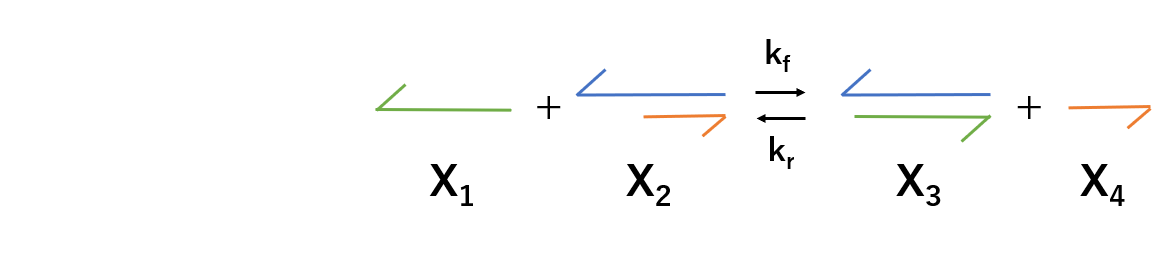


#### **4.1.2 鎖置換反応の微分方程式モデル (再掲)**
\begin{align}
&\frac{d x_1}{dt} = -k_f x_1 x_2 + k_r x_3 x_4\\
&\frac{d x_2}{dt} = -k_f x_1 x_2 + k_r x_3 x_4\\
&\frac{d x_3}{dt} = k_f x_1 x_2 - k_r x_3 x_4\\
&\frac{d x_4}{dt} = k_f x_1 x_2 - k_r x_3 x_4\\
&\end{align}

#### **4.1.3 鎖置換反応のサンプルコード**
本小節では、2.3で紹介したDNA鎖置換反応を定式化した微分方程式を解くシミュレーションの実装方法を紹介する。3.1.3で表したサンプルコードとの大きな違いは、変数が多くなった点である(3.1.3の場合は反応物がA, Bの2種類であったため、初期値および微分方程式モデルの次元が2次元であったが、DNA鎖置換反応では4種類の反応物について微分方程式が存在するため、初期値および微分方程式モデルの次元が4次元となる)。そのことに留意しながら、以下のサンプルコードを参照されたい。








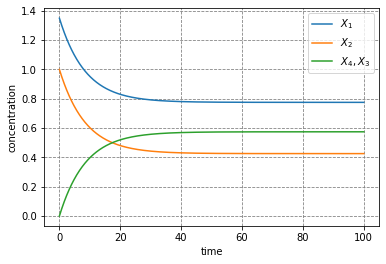

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#@title 4.1.3 DNA Strand Displacement Reaction { run: "auto", vertical-output: true, form-width: "50%", display-mode: "both" }

#################################
##### これより下の変数を変更  ###
#################################

# X1の初期濃度
x_1 = 1.35 #@param {type:"slider", min:0, max:2.0, step:0.05}
# µM

#反応パラメータ
k_f = 0.05
k_r = 0.05

#################################
##### これより上の変数を変更  ###
#################################

# その他のDNA鎖の初期濃度
x_2 = 1.0 # µM
x_3 = 0 # µM
x_4 = 0 # µM

y0 = [x_1, x_2, x_3, x_4]

# 時間を定義
t = np.linspace(0,100,1000) #(start, end, points)

# 微分方程式を定義
def odemodel(y, t, kf, kr):
    dydt = [-kf * y[0] * y[1] + kr * y[2] * y[3],
            -kf * y[0] * y[1] + kr * y[2] * y[3],
            kf * y[0] * y[1] - kr * y[2] * y[3],
            kf * y[0] * y[1] - kr * y[2] * y[3]]
            
    return dydt

model = lambda y,t: odemodel(y, t, k_f, k_r)

# 微分方程式を解かせる
y = odeint(model,y0,t).T

# グラフの描画
plt.plot(t,y[0], label = "$X_1$")
plt.plot(t,y[1], label = "$X_2$")
plt.plot(t,y[2], label = "$X_4, X_3$")
plt.xlabel('time')
plt.ylabel('concentration (µM)')
plt.grid(True, linestyle='--', color='grey')
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.show()


#### **4.1.4 サンプルコードを用いた練習問題**
本節では4.1.3で紹介した鎖置換反応のサンプルコードにスライドバーを移動させたり、追加することでシミュレーション結果がどのように変化するかを体験しましょう。
以下の2つの内容に取り組んでみましょう。

1. 上記のサンプルコードにおいて3.2を参照してスライドバーを動かす (初期濃度を変化させる) ことで、シミュレーション結果がのように変化するか、確かめてみましょう。

2. 上記のサンプルコードにおいて、初期濃度を変化させるだけではなく、反応速度係数の$k_f$, $k_r$についてもスライドバーを追加して、シミュレーション結果がのように変化するか、確かめてみましょう。

### **4.2 Lotka-Volterraモデルを模したDNA反応系**

本節では、振動するDNA反応系としてLotka-Volterraモデルを模したDNA反応系を用いて、複雑な反応におけるシミュレーションの実装方法を紹介する。

具体的は、まず初めに、一般的なLotka-Volterraモデルについて説明し、シミュレーションの実装方法の理解を目指す。

その後、Lotka-Volterraモデルを模したDNA反応系の構造について説明する。


#### **4.2.1 Lotka-Volterraモデルの概要**
本小節では、一般的なLotka-Volterraモデルの概要について説明する。Lotka-Volterraモデルは、自然界における被食者 (prey), 捕食者 (predator) の個体数の関係を表現したモデルである。

**(1) Lotka-Volterraモデルのイメージ**

Lotka-Volterraモデルでは、被食者 (prey) は、捕食者に捕食者される (被食する) 事象と増殖する事象が表現されている。一方、捕食者 (predator) は、被食者を捕食する事象と死滅する事象が表現されている。

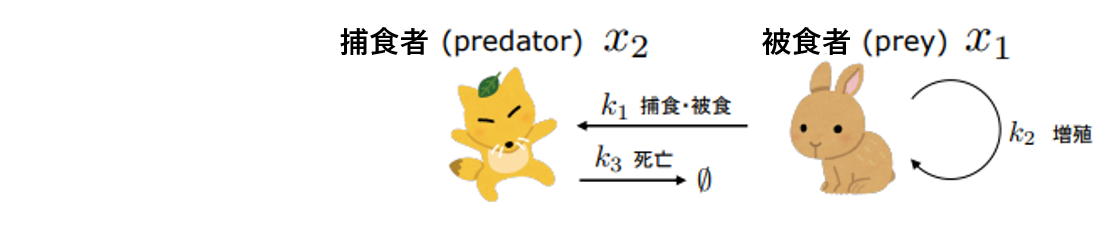

**(2) 反応式**

(1)の Lotka-Volterraモデルにおいて、被食者、捕食者の個体数をそれぞれ濃度として考え、反応式を記述すると以下のようになる。

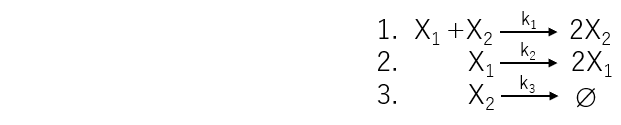

**(3) 微分方程式**

(2)で疑似的に表現した Lotka-Volterraモデルの反応式第2章の方法で微分方程式を定式化すると以下のようになる。

\begin{align}
&\frac{d x_1}{dt} = k_2 x_1 - k_1 x_1 x_2 \\
&\frac{d x_2}{dt} = k_1 x_1 x_2 - k_3 x_2 \\
&\end{align}


次小節では、上記のLotka-Volterraモデルの微分方程式モデルを用いて
被食者$x_1$と捕食者$x_2$の個体数の時間変化をシミュレーションの実装方法を紹介する。
<br>
<br>

出典①：Lotka, Elements of Physical Biology, 1925.

出典②：Volterra, Animal Ecology, 1926.


#### **4.2.2 Lotka-Volterraモデルのサンプルコード**
本小節では、4.3.1 で紹介したLotka-Volterraモデルの微分方程式を解くシミュレーションの実装方法を紹介する。下記のサンプルコードは、3.1のサンプルコードにおいて、微分方程式モデルを変更したコードとなっていることに留意して、参照されたい。

サンプルコードにてスライドバーを動かすことで反応速度定数を変えたときにシミュレーション結果がどのように変化するか体験してみましょう。


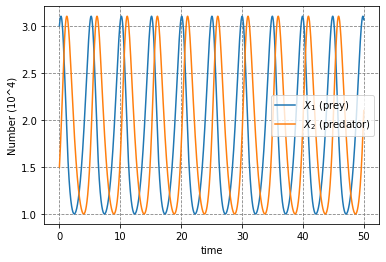

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#@title 4.2.2 Lotka-Volterra { run: "auto", vertical-output: true, form-width: "50%", display-mode: "both" }


k1 = 0.7 #@param {type:"slider", min:0, max:2, step:0.1}
k2 = 1.3 #@param {type:"slider", min:0, max:2, step:0.1}
k3 = 1.3 #@param {type:"slider", min:0, max:2, step:0.1}

# 初期値を設定
X1 = 3   #10^4匹
X2 = 1.5 #10^4匹
y0 = [X1, X2]

# 時間を定義
t = np.linspace(0,50,10000) #(start, end, points)

# 微分方程式を定義するコード
def odemodel(y, t, k_1, k_2, k_3):
    dydt = [ - k_1 * y[0] * y[1] + k_2 * y[0],  k_1 * y[0] * y[1] - k_3 * y[1]]
    return dydt
model = lambda y,t: odemodel(y, t, k1, k2, k3)

# 微分方程式を解かせる
y = odeint(model,y0,t).T

# グラフの描画
plt.plot(t,y[0], label = "$X_1$ (prey)")
plt.plot(t,y[1], label = "$X_2$ (predator)")
plt.xlabel('time')
plt.ylabel('Number (10^4)')
plt.grid(True, linestyle='--', color='grey')
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

#### **4.2.3 Lotka-Volterraモデルを模したDNA反応系の構造**
本小節では、4.2.2で紹介した Lotka-VolterraモデルをDNA反応系を用いて模した際のDNAの反応順序を紹介する。

反応の詳細に関しては、出典を参照されたい。

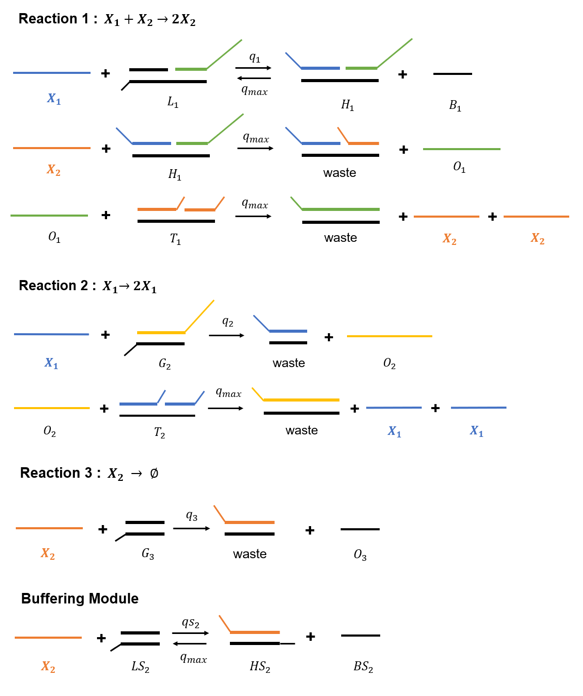


出典：Soloveichik, Seeing, Winfree, DNA as a universal substrate for chemical kinetics, PNAS, 2010, https://www.pnas.org/doi/10.1073/pnas.0909380107.


#### **4.2.4 Lotka-Volterraモデルを模したDNA反応系のサンプルコード**
本小節では、Lotka-Volterraモデルを模したDNA反応系のサンプルコードについて紹介する。

シミュレーション内容は、4.2.3の反応式を記述しただけであるが、反応が複雑になるため、細かい説明は省略する。

反応速度定数に関するパラメタを動かすことで、振動の波形がどのように変化するか体験してみましょう。

また、このように数多くの反応系が組み合わさったDNA回路であっても順を追って微分方程式を記述すれば、シミュレーションができることを体験してもらいたい。

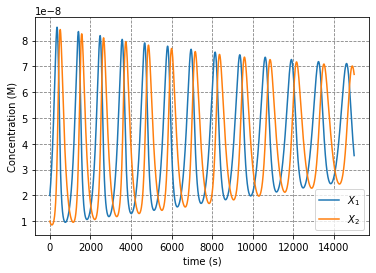

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#@title 4.2.4 DNA Lotka-Volterra { run: "auto", vertical-output: true, form-width: "50%", display-mode: "both" }


## 初期濃度を定義
X1 =20 * (10 ** -9) * (10 ** 9) # 20 nM
X2 =10 * (10 ** -9) * (10 ** 9) # 10 nM
Cmax =10 * (10 ** -6) * (10 ** 9) # 10 µM
L1 = T1 = B1 = G2 = T2 = G3 =  Cmax
H1 = O1 = O2 = HS = 0

y0 = [X1, L1, H1, B1, O1, T1, X2, G2, O2, T2, G3, HS]


## 速度定数を構成するパラメータ
k1 = 1 #@param {type:"slider", min:0, max:5, step:1}
k2 = 1 / 300
k3 = 1 / 300
gamma = 2

## 速度定数を設定
qmax = 10 ** 5 
q1= gamma * k1 * (10 ** 5) * (10 ** -9)
q2 = gamma * k2 * (Cmax ** -1)
q3 = gamma * k3 * (Cmax ** -1)
qs = gamma * k1

k_f1 = q1
k_f2 = qmax
k_f3 = qmax
k_f4 = q2
k_f5 = qmax
k_f6 = q3
k_f7 = qs * Cmax

k_r1 = qmax
k_r2 = qmax * Cmax


# 時間を定義
t = np.linspace(0,15000,10000) #(start, end, points)

# 微分方程式を定義
def odemodel_Lotka_Volterra(y, t, kf1, kf2, kf3, kf4, kf5, kf6, kf7, kr1, kr2):
    dydt = [ 
            #X1
            - kf1 * y[0] * y[1] + kr1 * y[2] * y[3] - kf4 * y[0] * y[7] + 2 * kf5 * y[8] * y[9],

            #L1
            - kf1 * y[0] * y[1] + kr1 * y[2] * y[3],

            #H1
            kf1 * y[0] * y[1] - kr1 * y[2] * y[3] - kf2 * y[2] * y[6],

            #B1 
            kf1 * y[0] * y[1] - kr1 * y[2] * y[3],

            #O1
            kf2 * y[2] * y[6] - kf3 * y[4] * y[5],

            #T1
            - kf3 * y[4] * y[5],

            #X2
            - kf2 * y[2] * y[6] + 2 * kf3 * y[4] * y[5] - kf6 * y[6] * y[10] - kf7 * y[6] +  kr2 * y[11],

            #G2
            - kf4 * y[0] * y[7],

            #O2
            kf4 * y[0] * y[7] - kf5 * y[8] * y[9],

            #T2 
            - kf5 * y[8] * y[9],

            #G3 
            - kf6 * y[6] * y[10],

            #HS
            kf7 * y[6] - kr2 * y[11]
            ]
    return dydt

model = lambda y,t: odemodel_Lotka_Volterra(y, t, k_f1, k_f2, k_f3, k_f4, k_f5, k_f6, k_f7, k_r1, k_r2)

# 微分方程式を解かせる
y = odeint(model,y0,t).T

# グラフの描画
plt.plot(t,y[0] * (10 ** -9), label = "$X_1$")
plt.plot(t,y[6] * (10 ** -9), label = "$X_2$")
plt.xlabel('time (s)')
plt.ylabel('Concentration (M)')
plt.grid(True, linestyle='--', color='grey') 
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

## **5. 発展：反応拡散方程式による時空間パターンの形成シミュレーション**
本章では、発展的な内容として、時間だけではなく、空間についても変化を考慮した偏微分方程式のモデルとして反応拡散について紹介する。

以下のリンクをクリックしてノートブックを自分のドライブにコピーしましょう。

https://drive.google.com/file/d/1Gj-wL1AMtKExmu_lW6HaXdo60s6qjCPc/view?usp=sharing




本教材は、**分子ロボティクス夏の学校2022ソフトウェア講習6**の内容をもとに作成しました。